# Redes neuronales

[![](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ganegroup/workshop_nn/blob/main/05_cats_vs_dogs_nn.ipynb)

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tensorflow_datasets as tfds
import tensorflow as tf
sns.set_theme()

2023-07-02 14:21:20.035483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Vimos anteriormente que había problemas de clasificación que podíamos denominar como "lineales", es decir que podíamos poner superficies de decisión que fueran líneas o planos. Sin embargo, si el dataset es complicado puede ocurrir que eso sea imposible y el problema pasa entonces a ser "no lineal".

<!-- ![Con la complejidad de los datos aumenta la necesidad de un modelo más complejo, con más neuronas y capas](images/dataset_complexity.png) -->

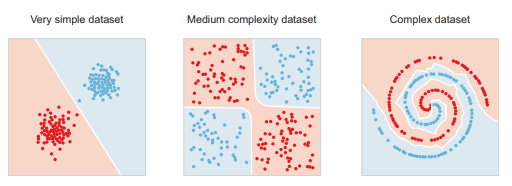


Si eso ocurre podemos recurrir a las redes neuronales. Las redes neuronales están inspiradas en el funcionamiento del cerebro y están compuestas por neuronas artificiales, conectadas entre sí, de alguna forma en particular. Podemos pensar a las neuronas artificiales simplemente como una "cosa" que guarda un número, ese número se denomina la **activación** de la neurona y podemos pensarlo como un indicador del estado de la neurona (activa o inactiva). 

<!-- ![Una neurona y su activación](images/neurona.png) -->

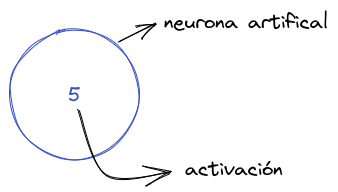

Regresando a nuestro problema de clasificación de perros vs gatos, podemos pensar que los pixeles de la imagen, agrupados en un vector columna, forman la **capa de entrada** de nuestra red. En los modelos simples que vimos, la capa de entrada se conecta a una sola neurona de salida que es la que nos da el "score", que podemos utilizar para distinguir si se trata de un perro o un gato. La forma en que la entrada se conecta a la salida es mediante los pesos y los bias de nuestro modelo. Esquemáticamente nos queda el diagrama de la derecha, que no es más que el famoso "perceptron" de Rosenblatt que vimos en la introducción.

<!-- ::: {layout-ncol="2"}
![perceptron](images/perceptron.png)

![Diagrama de un perceptron con cinco señales de entrada.](images/Perceptr%C3%B3n_5_unidades.svg.png)
::: -->

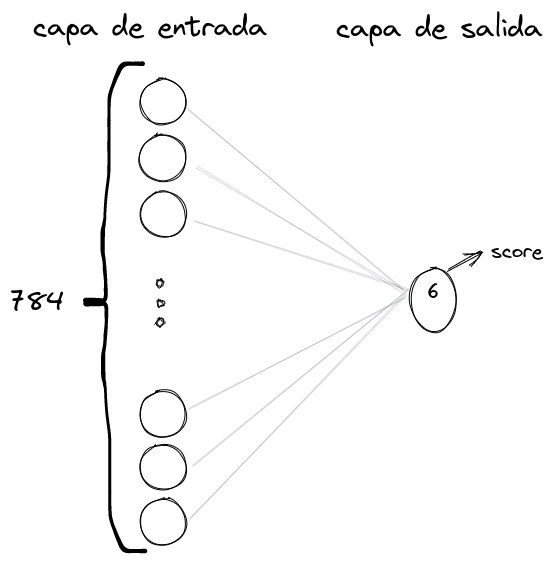

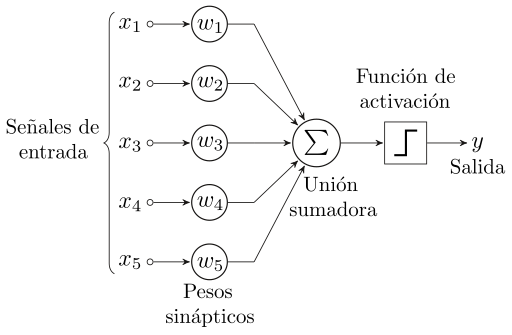

Mientras que el problema sea linealmente separable, una sola neurona (un solo perceptrón) puede ser suficiente. Pero si el problema no se puede separar con una sola línea o plano vamos a tener que empezar a agregar neuronas en la misma capa, o en capas subsiguientes. 

Si bien la estructura parece ahora mucho más compleja, resulta que si nos quedamos simplemente con operaciones lineales, es decir multiplicaciones de activaciones por pesos y sumas de bias, matemáticamente todo se puede reformular como una sola neurona donde interviene una matriz formada por la combinación de todos los pesos. Para que realmente una red neuronal tenga sentido tenemos que agregar a cada neurona una **no linealidad**. Esto se logra aplicando una función de activación no lineal sobre la salida de cada neurona. Eso le va a permitir realmente a la red ajustarse a prácticamente cualquier objetivo que les propongamos.

<!-- ![Una neurona con su función de activación](images/neurona_no_lineal.png) -->

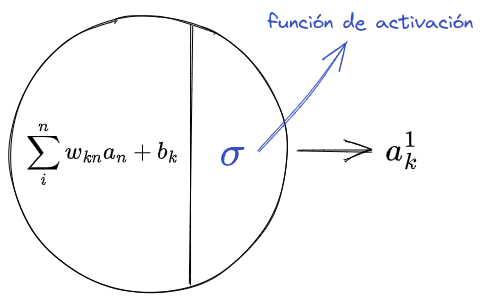

Pueden jugar con [Tensorflow playground](https://playground.tensorflow.org) para desarrollar una intuición y experimentar con diferentes problemas y arquitecturas.

Si empezamos a agregar capas intermedias, a menudo llamadas **capas ocultas**, tenemos lo que se denomina un **perceptrón multicapa**. Ahora las neuronas de cada capa están conectadas con las activaciones de la capa anterior, nuevamente a través de pesos y bias. 

<!-- ![Perceptrón multicapa](images/perceptron_multicapa.png) -->

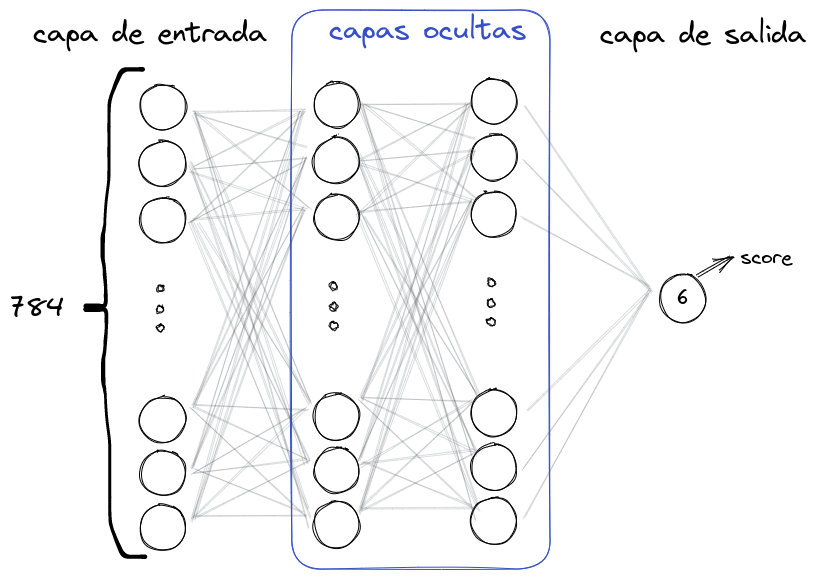


Hay una relación directa entre la matriz de pesos que vimos en ejemplos anteriores y estas conexiones. Podemos pensar a las activaciones de entrada como un vector columna, y a los pesos como organizados en una matriz donde cada fila corresponde a las conexiones entre la capa de entrada y una neurona en particular en la capa. 

<!-- ![Interacción entre una capa densa y la capa anterior](images/operacion_capas_densas.png)  -->

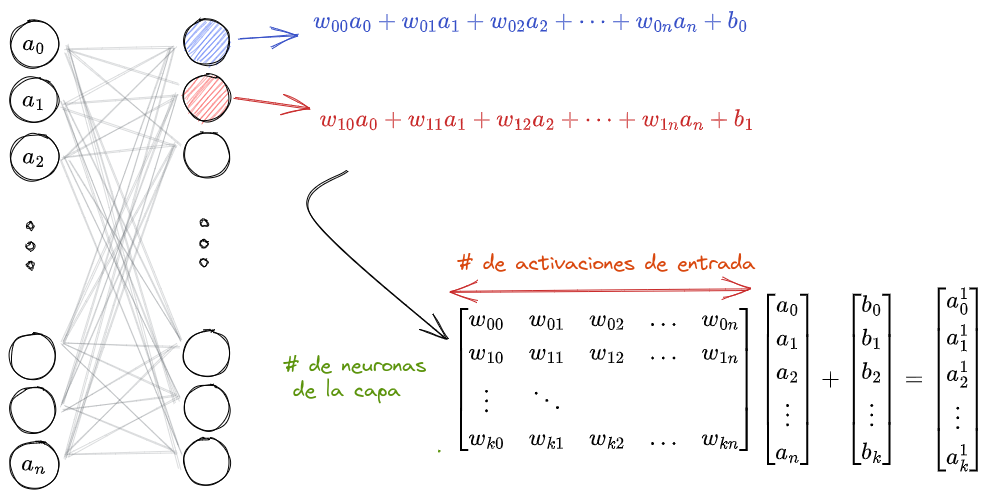


## Funciones de activación. 

Hay muchas funciones de activación posibles, las más utilizadas son las siguientes:

### Sigmoide

$$ F(z) = \frac{1}{1 + e^{-z}} $$

2023-07-02 14:21:20.922949: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:21:20.925936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 14:21:20.926059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Text(0.5, 0, 'z')

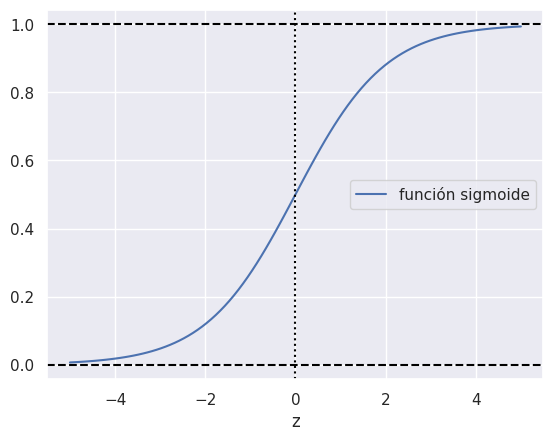

In [2]:
def sigmoid(z):
    return 1 / (1 + tf.math.exp(-z))

z = tf.linspace(-5, 5, 100)

ax = sns.lineplot(x=z, y=sigmoid(z), label="función sigmoide")

ax.axhline(1, linestyle="--", color="black")
ax.axhline(0, linestyle="--", color="black")
ax.axvline(0, linestyle=":", color="black")
ax.set_xlabel('z')


### Tanh

$$ F(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} $$

Text(0.5, 0, 'z')

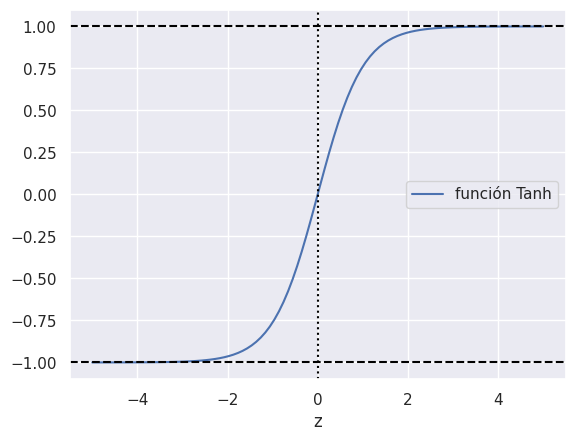

In [3]:
def tanh(z):
    return (tf.math.exp(z) - tf.math.exp(-z)) / ((tf.math.exp(z) + tf.math.exp(-z)))

z = tf.linspace(-5, 5, 100)

ax = sns.lineplot(x=z, y=tanh(z), label="función Tanh")

ax.axhline(1, linestyle="--", color="black")
ax.axhline(-1, linestyle="--", color="black")
ax.axvline(0, linestyle=":", color="black")
ax.set_xlabel('z')


### Rectified Linear Unit (ReLU)

$$ F(z) = \text{max}(0, z) $$

Text(0.5, 0, 'z')

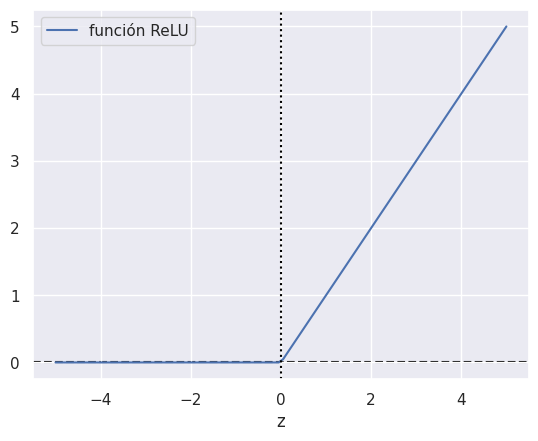

In [4]:
def relu(z):
    return tf.math.maximum(0, z)

z = tf.linspace(-5, 5, 100)

ax = sns.lineplot(x=z, y=relu(z), label="función ReLU")

ax.axvline(0, linestyle=":", color="black")
ax.axhline(0, linestyle="--", color="black", zorder=0)

ax.set_xlabel('z')


La función ReLU suele funcionar mejor que la sigmoide porque la pendiente en el extremo superior no se aplana, como lo hace la sigmoide. Para valores extremos de $z$, la sigmoide deja de responder.

### Leaky Rectified Linear Unit (Leaky ReLU)

$$ F(z) = \text{max}(\alpha z, z) $$

Text(0.5, 0, 'z')

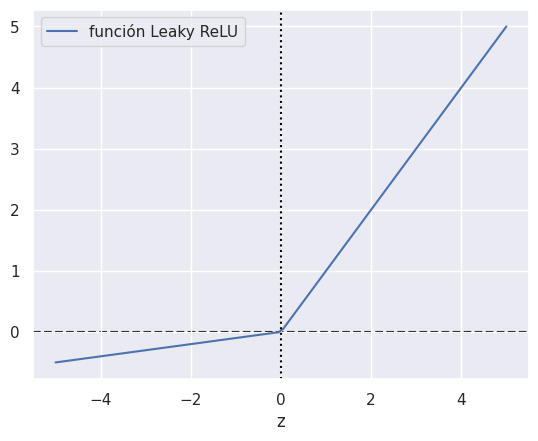

In [5]:
def leaky_relu(z, alpha=0.1):
    return tf.math.maximum(alpha * z, z)

z = tf.linspace(-5, 5, 100)

ax = sns.lineplot(x=z, y=leaky_relu(z), label="función Leaky ReLU")

ax.axvline(0, linestyle=":", color="black")
ax.axhline(0, linestyle="--", color="black", zorder=0)
ax.set_xlabel('z')

## Cats vs dogs pero con un perceptrón multicapa

In [6]:
import tensorflow_datasets as tfds
import tensorflow as tf

# cargamos el dataset
(train_data, validation_data), info = tfds.load('cats_vs_dogs', split=["train[:75%]", "train[75%:]"], with_info=True)


# definimos las transformaciones que vamos a aplicar a las imagenes

def select_data(example):
    """ Return an (image, label) tuple """
    return example["image"], example["label"]


def normalize(image, label):
    """ Normalize image: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label
              

def resize(image, label):
    """ Resize the image"""
    image = tf.image.resize(image, [28, 28], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image, label


def to_grayscale(image, label):
    """ Transform the image to grayscale """
    image = tf.image.rgb_to_grayscale(image)
    return image, label


def flatten(image, label):
    """ Flatten the image to a single column vector"""
    image = tf.reshape(image, shape=[-1])
    return image, label


def label_to_float(image, label):
    """ cast the label to float32 """
    label = tf.cast(label, tf.float32)
    return image, label


def pipeline(dataset):
    dataset = dataset.map(select_data)
    dataset = dataset.map(label_to_float)
    dataset = dataset.map(normalize)
    dataset = dataset.map(to_grayscale)
    dataset = dataset.map(resize)
    dataset = dataset.map(flatten)
    dataset = dataset.cache()
    dataset =  dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# le aplicamos la misma pipeline a nuestro dataset de entrenamiento y de validación

train_data = pipeline(train_data)
validation_data = pipeline(validation_data)

# Hacemos batchs de imágenes
batch_size = 64
batched_train_data = train_data.batch(batch_size)
batched_validation_data = validation_data.batch(batch_size)

In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

El inicializador controla el valor inicial para todo los pesos la red, aquí estamos usando la inicialización de Xavier (también conocido como Glorot), el método de inicialización predeterminado para Keras. Los investigadores encontraron que este tipo de inicialización funciona mejor que simplemente valores al azar. Otra alternativa puede ser MSRA (también conocida como inicialización de He et. al).

In [8]:
def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

In [9]:
class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

In [10]:
class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return tf.squeeze(x, axis=1)

In [11]:
hidden_layer_1_size = 700
hidden_layer_2_size = 500
output_size = 1

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

In [12]:
def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

In [13]:
def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

In [14]:
# Set training parameters
epochs = 100
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in batched_train_data:
    with tf.GradientTape() as tape:
      y_pred_batch = mlp_model(x_batch)
      batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, mlp_model.variables)
    for g,v in zip(grads, mlp_model.variables):
      v.assign_sub(learning_rate * g)
    
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in batched_validation_data:
    y_pred_batch = mlp_model(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 20 == 0:
    print(f"Epoch: {epoch}, Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")

2023-07-02 14:21:22.400194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
2023-07-02 14:21:22.400472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [6]
	 [[{{node Placeholder/_2}}]]
2023-07-02 14:21:23.061445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 

Epoch: 0, Training loss: 0.685, Training accuracy: 0.553
Epoch: 20, Training loss: 0.617, Training accuracy: 0.658
Epoch: 40, Training loss: 0.561, Training accuracy: 0.711
Epoch: 60, Training loss: 0.491, Training accuracy: 0.764
Epoch: 80, Training loss: 0.416, Training accuracy: 0.820


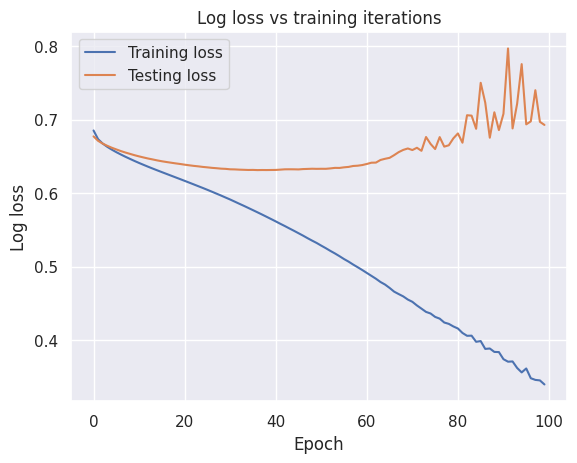

In [15]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

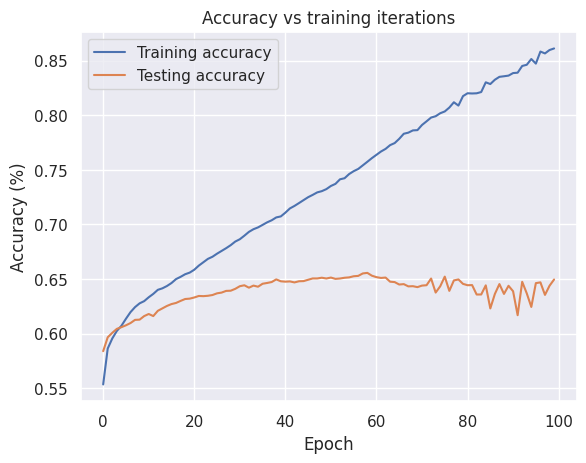

In [16]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [17]:
def show_confusion_matrix(y, y_classes, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y, y_classes)
  confusion_normalized = confusion / confusion.sum(axis=1)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [18]:
import numpy as np

y_pred_train = np.array([])
y_train = np.array([])
for images, labels in batched_train_data:
    r = mlp_model(images)
    y_pred_train = np.concatenate([y_pred_train, r.numpy()])
    y_train = np.concatenate([y_train, labels])


y_pred_test = np.array([])
y_test = np.array([])
for images, labels in batched_validation_data:
    r = mlp_model(images)
    y_pred_test = np.concatenate([y_pred_test, r.numpy()])
    y_test = np.concatenate([y_test, labels])

train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

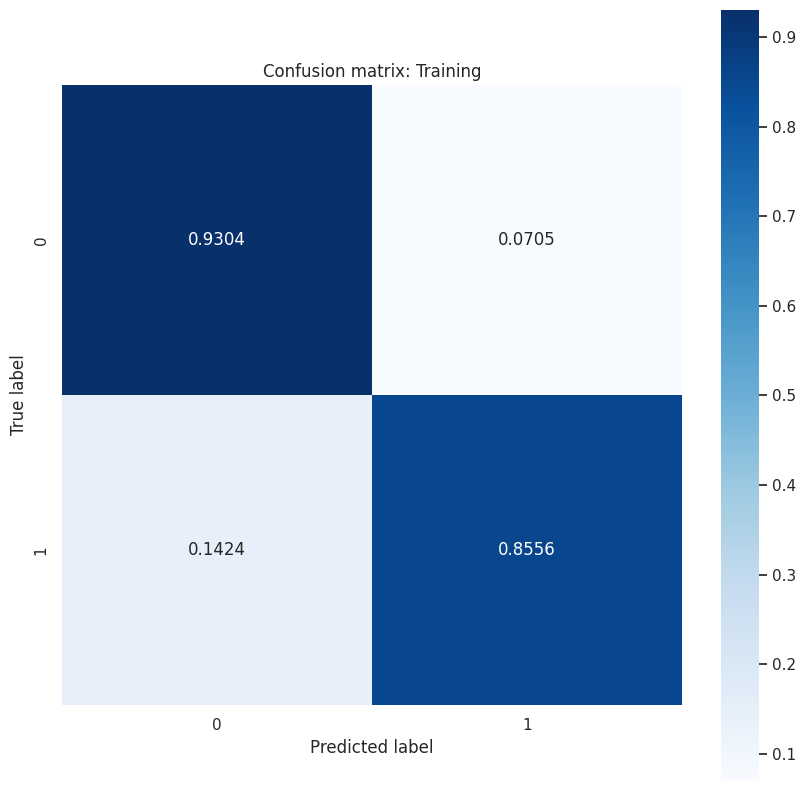

In [19]:
show_confusion_matrix(y_train, train_classes, 'Training')

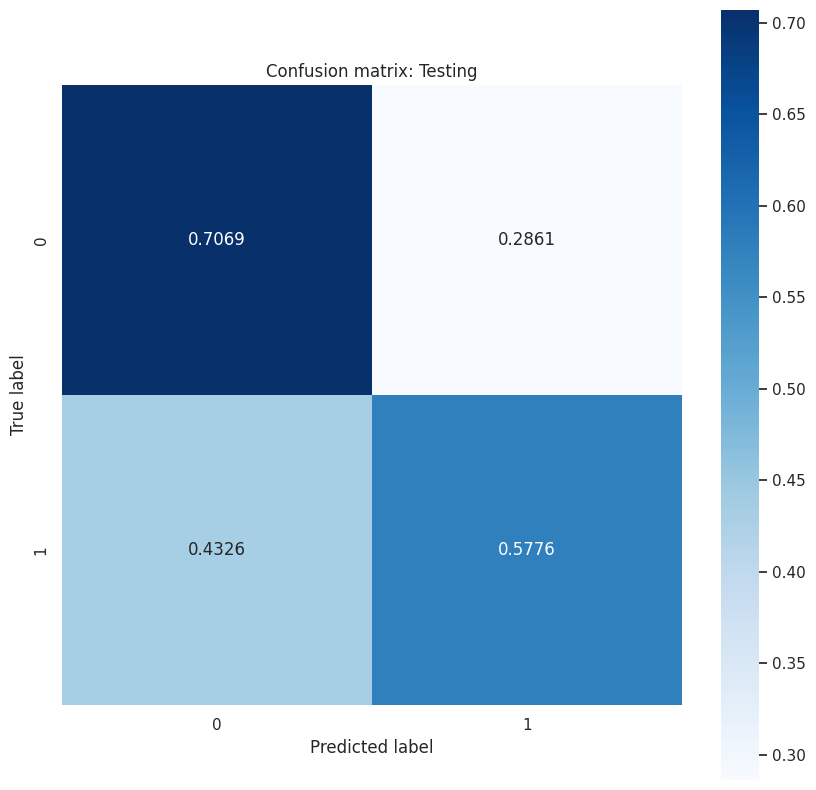

In [20]:
show_confusion_matrix(y_test, test_classes, 'Testing')

## Keras: una API de alto nivel

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

[Keras](https://keras.io/) es una API de aprendizaje profundo escrita en Python, que se ejecuta sobre la plataforma de aprendizaje automático TensorFlow. Fue desarrollado con un enfoque en permitir la experimentación rápida. Proporciona abstracciones esenciales y bloques de construcción para desarrollar redes neuronales. 

Las estructuras de datos centrales de Keras son `layers` y `models`. El tipo de modelo más simple es el modelo secuencial, una stack lineal de capas. 

Un modelo secuencial es apropiado cuando tenemos un stack simple de capas en donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

Aquí tenemos un modelo secuencial que sigue la misma estructura que el ejemplo anterior:

In [22]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(700, activation="relu", name="layer1"),
        layers.Dense(500, activation="relu", name="layer2"),
        layers.Dense(1, activation="linear", name="output"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 700)               549500    
                                                                 
 layer2 (Dense)              (None, 500)               350500    
                                                                 
 output (Dense)              (None, 1)                 501       
                                                                 
Total params: 900,501
Trainable params: 900,501
Non-trainable params: 0
_________________________________________________________________


Notemos que el modelo incluye las `tf.Variables` que son las que serán actualizadas durante el entrenamiento

In [23]:
for variable in model.variables:
    print(variable.name, variable.shape)

layer1/kernel:0 (784, 700)
layer1/bias:0 (700,)
layer2/kernel:0 (700, 500)
layer2/bias:0 (500,)
output/kernel:0 (500, 1)
output/bias:0 (1,)


Una vez que el modelo se vea bien, podemos configurar su proceso de aprendizaje con `.compile()`. Podemos elegir el optimizador, la función de pérdida y las métricas que vamos a traquear. Cada uno de esos aspectos puede ser configurado mediante argumentos. 

In [24]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)],
)

In [25]:
history = model.fit(
    x=batched_train_data,
    epochs=100,
    validation_data=batched_validation_data,
)

Epoch 1/100


2023-07-02 14:23:53.292982: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x358ebbc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-02 14:23:53.293005: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-07-02 14:23:53.383317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-02 14:23:53.426776: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


273/273 [==============================] - 1s 2ms/step - loss: 0.6837 - binary_accuracy: 0.5069 - val_loss: 0.6767 - val_binary_accuracy: 0.5113
Epoch 2/100
273/273 [==============================] - 0s 1ms/step - loss: 0.6724 - binary_accuracy: 0.5187 - val_loss: 0.6712 - val_binary_accuracy: 0.5280
Epoch 3/100
273/273 [==============================] - 0s 2ms/step - loss: 0.6665 - binary_accuracy: 0.5285 - val_loss: 0.6675 - val_binary_accuracy: 0.5385
Epoch 4/100
273/273 [==============================] - 0s 1ms/step - loss: 0.6620 - binary_accuracy: 0.5363 - val_loss: 0.6647 - val_binary_accuracy: 0.5464
Epoch 5/100
273/273 [==============================] - 0s 1ms/step - loss: 0.6582 - binary_accuracy: 0.5432 - val_loss: 0.6624 - val_binary_accuracy: 0.5519
Epoch 6/100
273/273 [==============================] - 0s 2ms/step - loss: 0.6549 - binary_accuracy: 0.5504 - val_loss: 0.6601 - val_binary_accuracy: 0.5583
Epoch 7/100
273/273 [==============================] - 0s 2ms/step - l

<Axes: >

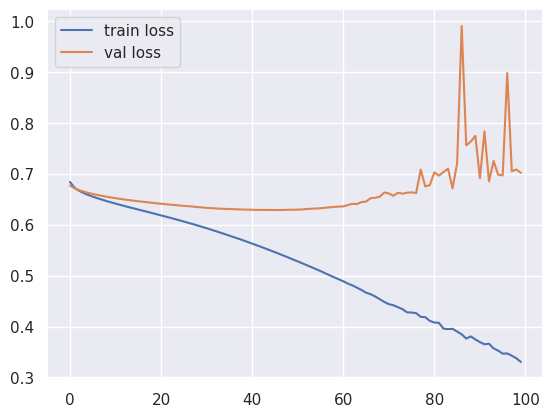

In [26]:
sns.lineplot(x=history.epoch, y=history.history['loss'], label="train loss")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val loss")


<Axes: >

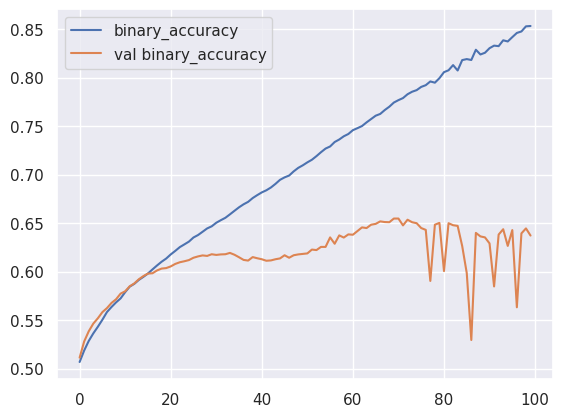

In [27]:
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], label="binary_accuracy")
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], label="val binary_accuracy")


Si bien, Keras hace que sea fácil comenzar encapsulando las abstracciones más complejas, también permite manejar casos de uso arbitrariamente avanzados. Esto se puedo lograr combinando la funcionalidad de keras con la capacidad de TensorFlow `GradientTape`. 

Por ejemplo, el siguiente código desacopla cada componente de manera tal que cada uno puede ser modificado individualmente.

```python

# Prepare an optimizer.
optimizer = tf.keras.optimizers.Adam()
# Prepare a loss function.
loss_fn = tf.keras.losses.kl_divergence

# Iterate over the batches of a dataset.
for inputs, targets in dataset:
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        # Forward pass.
        predictions = model(inputs)
        # Compute the loss value for this batch.
        loss_value = loss_fn(targets, predictions)

    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(loss_value, model.trainable_weights)
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
```

Existe también la posibilidad de crear nuestros propios modelos, capas, optimizadores, funciones de pérdida y métricas.